# Text mining & Search Project

### Università degli Studi di Milano-Bicocca  2020/2021

**Luzzi Federico** (matricola) **Peracchi Marco** 800578

# Feature extraction

In questa parte del progetto estraiamo dal report diverse feature che potrebbero essere utili al classificatore.

In [1]:
import nltk
import re
import os
from gensim.models.doc2vec import Doc2Vec, TaggedDocument # doc2vec
import pandas as pd
import numpy as np
import pickle

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import AdaBoostClassifier

In [7]:
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS
import seaborn as sns
from utils import c_matrix
from process_text import processing # preprocessing functions
from features import *

In [8]:
nltk.download("stopwords")
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Marco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Marco\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Marco\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Marco\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [9]:
if 'processed_data.csv' not in os.listdir('../data'):
    # load dataset
    df = pd.read_csv("../data/labeled_data.csv", sep = ",").drop("Unnamed: 0", axis=1)
    # apply process_text
    df["tweet_clean"] = df["tweet"].apply(lambda x : processing(x))
    df.to_csv('../data/processed_data.csv', index = False)
else:
    df = pd.read_csv("../data/processed_data.csv", sep = ",")
print("Load & preprocessing --- DONE")

Load & preprocessing --- DONE


In [10]:
# drop tweet list na !!!
df["tweet_list"] = df["tweet_clean"].str.split(" ").tolist()
df.dropna(inplace = True)
df = df.reset_index(drop = True)# drop 2 NA because tweet is empty

### Sentiment Analysis

In [11]:
sentiments = []
sentiment_analyzer = VS()
for tweet in df['tweet_clean']:
    sentiment = sentiment_analyzer.polarity_scores(tweet)
    sentiments.append(sentiment)

In [12]:
neg = []
neu = []
pos = []
compound = []
for sentiment in sentiments:
    neg.append(sentiment['neg'])
    neu.append(sentiment['neu'])
    pos.append(sentiment['pos'])
    compound.append(sentiment['compound']) 

# save in dataframe  
df['neg'] = neg
df['neu'] = neu
df['pos'] = pos
df['compound'] = compound

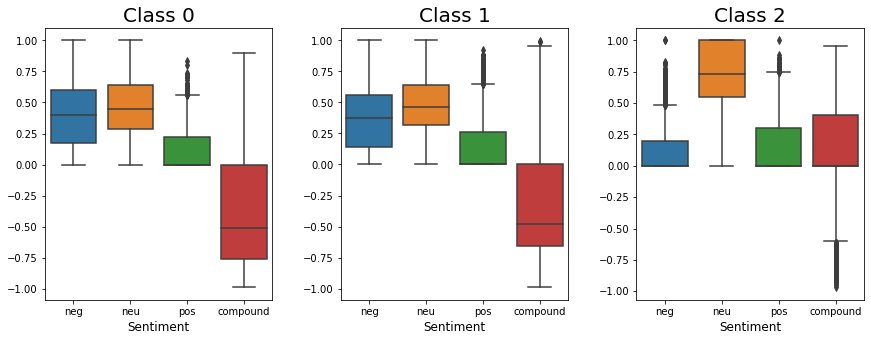

In [13]:
selected_columns = ["neg", "neu", "pos", "compound"]

fig, axs = plt.subplots(ncols = 3, figsize=(13,5))
for i in range(3):
    sns.boxplot(x="variable", y="value", data=pd.melt(df[df['class'] == i][selected_columns]), ax = axs[i])
    axs[i].set_title(f"Class {i}", size = 20)
    axs[i].set_xlabel("Sentiment", size = 12)
    axs[i].set_ylabel("")
    #axs[i].set_xticks(size = 12)
    #axs[i].set_yticks(size = 12)
plt.subplots_adjust(right = 1, wspace = 0.3)

### Retweet

In [14]:
def retweet(text):
    text = preprocessing(text)
    text_tokenized = tokenization(text)
    flag = 0
    for token in text_tokenized:
        if token == "rt":
            flag = 1
    return flag

In [ ]:
df["rt"] = df["tweet"].apply(lambda x : retweet(x))

### Tweet's length

In [15]:
def tweet_length(text_clean):
    return len(text_clean)

In [ ]:
df["len"] = df["tweet_clean"].apply(lambda x : tweet_length(x))

### Tag's people

In [ ]:
def reply_tweet(text):
    if re.search("@\w+", text):
        return 1
    else:
        return 0

In [ ]:
df["num_rep"] = df["tweet"].apply(lambda x : reply_tweet(x))

### Number of exclamation points

In [ ]:
def exclamation(text):
    return len(re.findall("!", text))

In [ ]:
df["num_exc"] = df["tweet"].apply(lambda x : exclamation(x))

### Number of emoji

In [ ]:
def emoji(text):
    return len(re.findall("&#1\d+", text))

In [ ]:
df["emoji"] = df["tweet"].apply(lambda x : emoji(x))